<div style="text-align:center"><img src="assets/intro.jpg"/></div>

# <span style="color:#264896">Mission 1 : Analyse en Composante Principale (ACP) du fichier source</span>

### <span style="color:#17aafa">Sommaire</span>

1. [Préparation du jeu de données](#prep)     
2. [Eboulis des valeurs propres](#eboulis)    
3. [Représentation des variables par le cercle des corrélations](#corr)    
    1. [Cercle des corrélations](#corr)     
    2. [Qualité de représentation des variables (𝐶𝑂𝑆²)](#cos2)
    3. [Contribution des variables aux axes (𝐶𝑇𝑅)](#ctr)    
    4. [Variable illustrative sur le résultat "vrai/faux" billet (is_genuine)](#illust)     
4. [Représentation des individus par les plans factoriels](#ind)    
    1. [Projection des individus sur le plan factoriel](#facto_ind)     
    2. [Qualité de représentation des individus (𝐶𝑂𝑆²)](#cos2_ind)    
    3. [Contribution des individus aux axes (𝐶𝑇𝑅)](#ctr_ind)    
    4. [Calcul et affichage des centroïdes sur la variable is_genuine](#centroides)
    
A la suite de cette ACP, la mission 2 consistera à appliquer un algorithme de classification et à analyser ses résultats.
Le détail de cette classification est disponible dans la partie [Mission 2 : Classification par Kmeans](#mission2)

In [1]:
# Importation des librairies utilisées
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importation du fichier source
dataset = pd.read_csv("datas/notes.csv", sep=",", decimal=".", header=0)
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


La variable donnant la nature Vrai/Faux du billet *(is_genuine)* sera utilisée comme variable illustrative. Nous la retirons donc de la matrice des variables analysées par ACP pour ne pas fausser les calculs. Elle sera ensuite ajoutée dans le cercle des corrélations pour visualisation.

## <span style="color:#17aafa" id="prep">Préparation du jeu de données</span>

In [3]:
acp_dataset = dataset.iloc[:, 1:]

#nombre d'observations 
n = acp_dataset.shape[0] 
#nombre de variables / dimenssions
p = acp_dataset.shape[1]

In [4]:
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction 
Z = sc.fit_transform(acp_dataset) 
print(Z)

[[-0.42834385  2.6694537   3.09656321 -0.13159013 -1.18987367  0.28163308]
 [-0.88755932 -1.09769709 -0.69125444 -0.86012554 -1.27473985  0.78069736]
 [-0.36274164 -1.03042654 -0.50943919 -0.30301023 -1.23230676  1.37740465]
 ...
 [ 1.73652911  0.68497248  0.52084721  0.38267015  0.67718214 -2.05094997]
 [-0.39554274 -0.32408577 -0.1458087   0.16839504  1.61071005 -0.75989238]
 [ 0.06367273 -0.22317994  0.06630909  1.45404575  0.38015054 -1.74717171]]


In [5]:
#instanciation de l'ACP 
acp = PCA(svd_solver='full')
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [6]:
#calculs des coordonnées factorielles dans la variable coord 
coord = acp.fit_transform(Z) 
#nombre de composantes calculées 
print(acp.n_components_)

6


## <span style="color:#17aafa" id="eboulis">Eboulis des valeurs propres</span>

In [7]:
#variance expliquée 
valprop = acp.explained_variance_
print(valprop)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


In [8]:
#proportion de variance expliquée 
valprop_ratio = acp.explained_variance_ratio_
print(valprop_ratio)

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


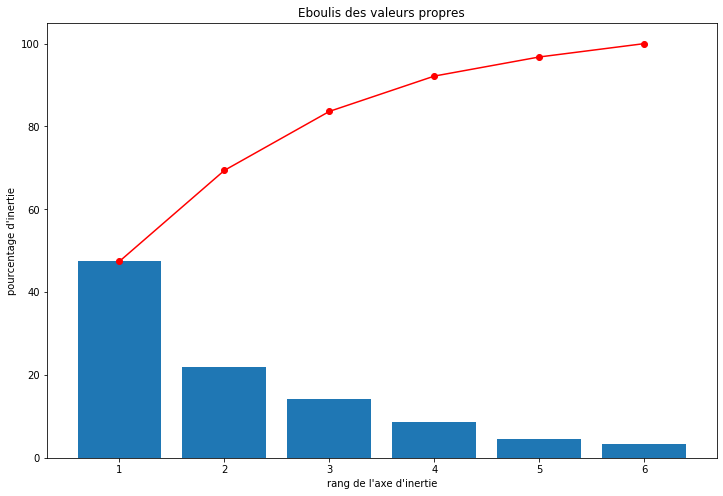

In [9]:
# Eboulis des valeurs propres
varexpl = valprop_ratio*100
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
fig.savefig('graph/ACP_eboulis_valeurs-propres.png')

On remarque ici que **les 2 premiers axes cumulent 69.40%** de l'inertie totale. Une analyse sur $F_1$ et $F_2$ semble donc cohérante.

## <span style="color:#17aafa" id="variables">Représentation des variables</span>

### <span style="color:#264896" id="corr">Cercle des corrélations</span>

In [10]:
pcs = acp.components_
print(pcs)

[[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
 [ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]
 [-0.08889419  0.12276016  0.15383022  0.5128076  -0.82114881  0.12691346]
 [-0.55973158  0.2780463   0.45893794 -0.22652773  0.13533955  0.57370304]
 [-0.22509444  0.71592059 -0.48699285 -0.31190784 -0.1939426  -0.25441684]
 [ 0.12216606  0.23213146 -0.4808135   0.54763041  0.35437971  0.52395111]]


Ici, les facteurs sont en ligne, les variables en colonne. Nous devons en tenir compte pour obtenir les corrélations en les multipliant par la racine carrée des valeurs propres :

In [11]:
sqrt_valprop = np.sqrt(valprop)

In [12]:
#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
for k in range(p): 
    corvar[:,k] = acp.components_[k,:] * sqrt_valprop[k] 

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 0.12399984  0.89750708 -0.08239513 -0.40152883 -0.11876949  0.05386727]
 [ 0.80466983  0.39053898  0.11378517  0.19945918  0.37775042  0.10235485]
 [ 0.83228631  0.2711525   0.14258369  0.32922354 -0.25695832 -0.21200743]
 [ 0.7294063  -0.36899666  0.47531625 -0.16250184 -0.16457596  0.24146933]
 [ 0.59658665 -0.16245462 -0.76111465  0.09708712 -0.10233243  0.15625837]
 [-0.78752871  0.36208895  0.11763482  0.41155139 -0.13424124  0.23102831]]


In [13]:
#on affiche pour les deux premiers axes 
pd.DataFrame({'id':acp_dataset.columns,'COR_F1':corvar[:,0],'COR_F2':corvar[:,1]})

,id,COR_F1,COR_F2
0,diagonal,0.124000,0.897507
1,height_left,0.804670,0.390539
2,height_right,0.832286,0.271153
3,margin_low,0.729406,-0.368997
4,margin_up,0.596587,-0.162455
5,length,-0.787529,0.362089


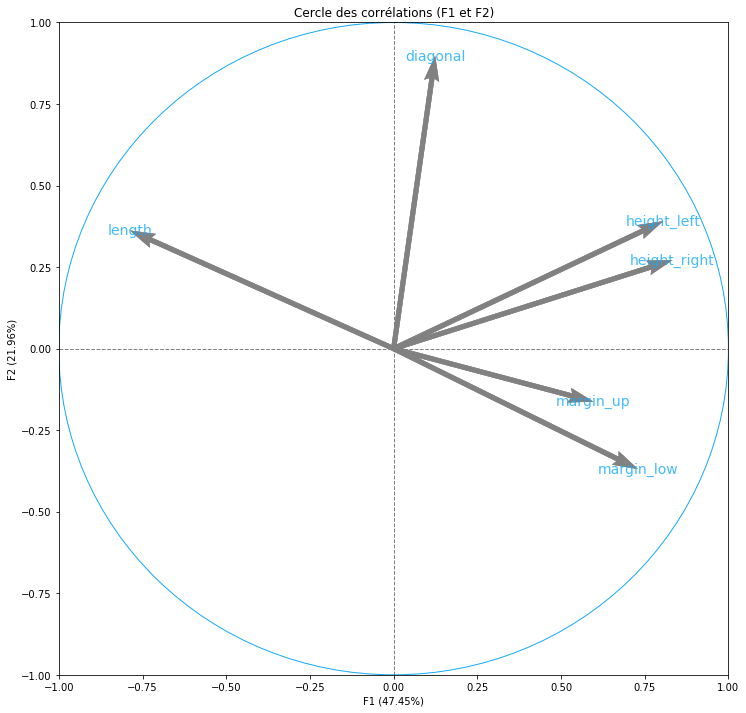

In [14]:
#cercle des corrélations 
fig, axes = plt.subplots(figsize=(12,12)) 

#détermination des limites du graphique
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) 

#affichage des flèches et noms de variables 
for j in range(p):
    plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   corvar[j,0],corvar[j,1], 
                   angles='xy', scale_units='xy', scale=1, color="grey", alpha=0.5)
    plt.annotate(acp_dataset.columns[j],
                     (corvar[j,0],corvar[j,1]),
                     ha='center', va='center',
                     fontsize='14',color="#17aafa", alpha=0.8) 

#ajouter les axes 
plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
axes.add_artist(cercle) 

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("Cercle des corrélations (F1 et F2)")

#affichage 
plt.show()
fig.savefig('graph/ACP_cercle_correlations_1.png')

### <span style="color:#264896" id="cos2">Qualité de représentation des variables ($COS^2$)</span>
On peut calculer la qualité de représentation des variables en élevant la corrélation au carré :

In [38]:
cos2var = corvar**2 
df_cos2var = pd.DataFrame({'id':acp_dataset.columns,'COS2_F1':cos2var[:,0],'COS2_F2':cos2var[:,1]})
df_cos2var = df_cos2var.set_index('id')

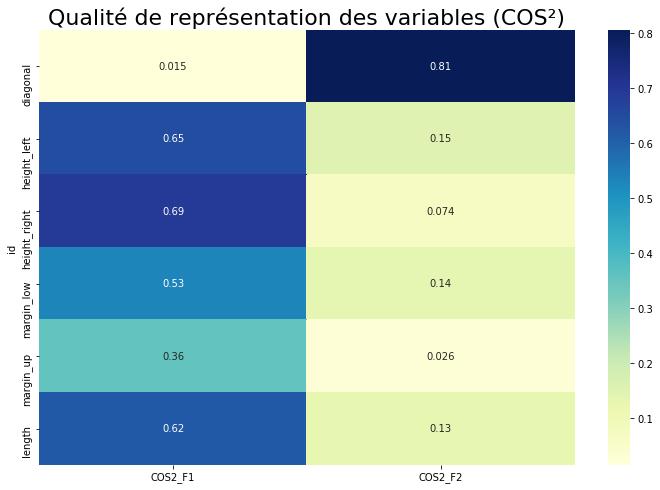

In [40]:
#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_cos2var, annot=True, cmap="YlGnBu")
plt.title("Qualité de représentation des variables (COS²)", fontsize=22)
plt.show()
fig.savefig('graph/ACP_cos2_var.png')

On remarque ici clairement, avec le cercle et le COS², les corrélations importantes entre les hauteurs de billet notamment ou encore les marges. Ce qui semble relativement normal. **L'axe $F_1$ va donc parfaitement représenter le facteur "dimenssions globales" et l'axe $F_2$ quant à lui représentera bien les variables de "diagonale"**.

### <span style="color:#264896" id="ctr">Contribution des variables aux axes $(CTR)$</span>
La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe :

In [42]:
#contributions 
ctrvar = cos2var 
for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/valprop[k] 

#on n'affiche que pour les deux premiers axes 
df_ctrvar = pd.DataFrame({'id':acp_dataset.columns,'CTR_F1':ctrvar[:,0],'CTR_F2':ctrvar[:,1]})
df_ctrvar = df_ctrvar.set_index('id')

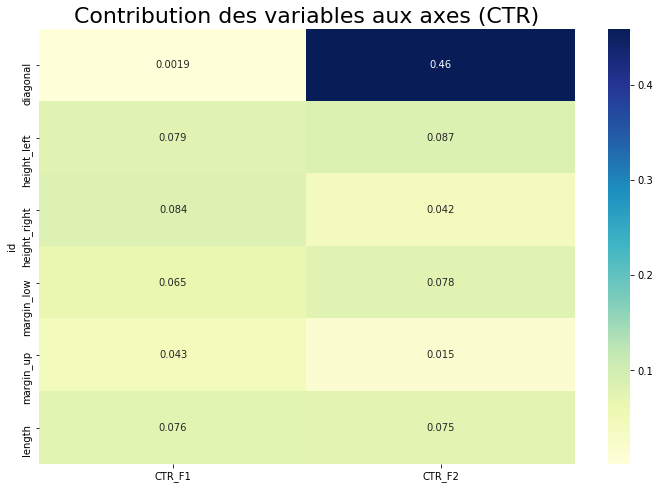

In [43]:
#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_ctrvar, annot=True, cmap="YlGnBu")
plt.title("Contribution des variables aux axes (CTR)", fontsize=22)
plt.show()
fig.savefig('graph/ACP_ctr_var.png')

On voit que les variables qui ont le plus de contribution à $F_1$ sont *height_right* et *height_left*, puis *length* ensuite. La variable qui contribue très fortement à $F_2$ est bien *diagonal* 

### <span style="color:#264896" id="illust">Variable illustrative sur le résultat "vrai/faux" billet *(is_genuine)*</span>

In [44]:
viGenuine = dataset['is_genuine'].values 
print(viGenuine)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [45]:
viGenuine = viGenuine.reshape((viGenuine.shape[0],1))
viGenuine.shape

(170, 1)

In [46]:
#corrélation avec les axes factoriels 
corSupp = np.zeros((viGenuine.shape[1],p))
for k in range(p): 
    for j in range(viGenuine.shape[1]): 
        corSupp[j,k] = np.corrcoef(viGenuine[:,j],coord[:,k])[0,1] 

#affichage des corrélations avec les axes 
print(corSupp)

[[-0.83869593  0.36633913  0.02077017  0.16326643  0.11232141 -0.08449246]]


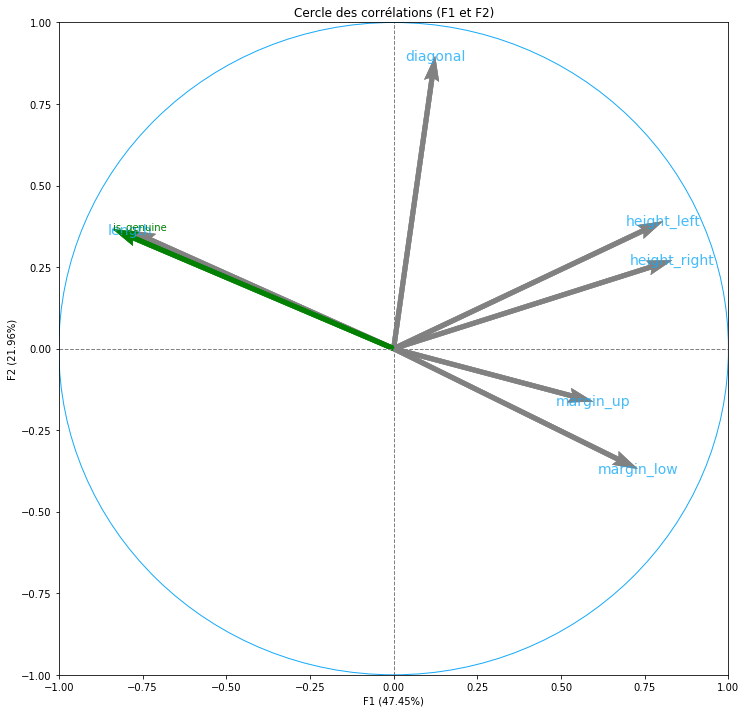

In [47]:
#cercle des corrélations 
fig, axes = plt.subplots(figsize=(12,12)) 

#détermination des limites du graphique
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) 

#affichage des flèches et noms de variables 
for j in range(p):
    plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   corvar[j,0],corvar[j,1], 
                   angles='xy', scale_units='xy', scale=1, color="grey", alpha=0.5)
    plt.annotate(acp_dataset.columns[j],
                     (corvar[j,0],corvar[j,1]),
                     ha='center', va='center',
                     fontsize='14',color="#17aafa", alpha=0.8) 

#variable illustrative
plt.annotate(dataset.columns[0],(corSupp[0,0],corSupp[0,1]),color='g')
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   corSupp[0,0],corSupp[0,1], 
                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

#ajouter les axes 
plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
axes.add_artist(cercle) 

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("Cercle des corrélations (F1 et F2)")

#affichage 
plt.show()
fig.savefig('graph/ACP_cercle_correlations_2.png')

En plaçant la variable illustrative ***is_genuine*** *(ici en vert)*, on peut s'apercevoir qu'elle est très corrélée à la variable *length* et presque orthogonale à la variable *diagonal*. **Elle sera donc très bien représentée sur les composantes principales $F_1$ et $F_2$**

## <span style="color:#17aafa" id="ind">Représentation des individus</span>

Les coordonnées factorielles des individus ont été stockées dans la variable *coord*. Nous les positionnons dans le premier plan factoriel avec leurs labels et colorons les points en fonction de la variable illustrative *is_genuine*.

### <span style="color:#264896" id="facto_ind">Projection des individus sur le plan factoriel</span>

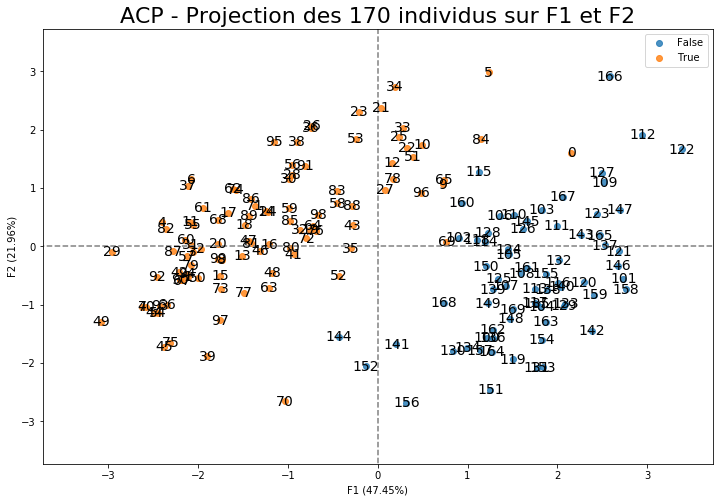

In [48]:
# initialisation de la figure       
fig = plt.figure(figsize=(12,8))

# Affichage des points et variable illustrative
illustrative_var = np.array(dataset['is_genuine'].values)
for value in np.unique(illustrative_var):
    selected = np.where(illustrative_var == value)
    plt.scatter(coord[selected, 0], coord[selected, 1], alpha=0.8, label=value)
    plt.legend()

# affichage des labels des points
for i,(x,y) in enumerate(coord[:,[0,1]]):
    plt.text(x, y, acp_dataset.index[i], fontsize='14', ha='center',va='center')
    
# détermination des limites du graphique
boundary = np.max(np.abs(coord[:, [0,1]])) * 1.1
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("ACP - Projection des {} individus sur F1 et F2".format(coord.shape[0]), fontsize=22)
plt.show(block=False)

Les 2 nuages de points en fonction de la variable "vrai / faux billet" sont ici clairement identifiés grâce à cette projection sur le premier plan factoriel $F_1$ / $F_2$. Testons à présent la qualité de la représentation.

### <span style="color:#264896" id="cos2_ind">Qualité de représentation des individus ($COS^2$)</span>

Calculons les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale :

In [49]:
#contribution des individus dans l'inertie totale 
di = np.sum(Z**2,axis=1) 
df_contind = pd.DataFrame({'ID':acp_dataset.index,'d_i':di})
df_contind = df_contind.sort_values("d_i", ascending=False)
df_contind

,ID,d_i
166,166,20.625650
0,0,18.410598
4,4,18.039567
122,122,16.790944
39,39,15.052608
...,...,...
59,59,1.484454
76,76,1.435202
85,85,1.431664
98,98,0.878319


On remarque que certains individus (166, 0, 4 ...) contribuent fortement à l'inertie totale. Sur la projection graphique, on les retrouve bien aux extrémités du plan factoriel pour leur catégorie.

Nous pouvons à présent calculer la qualité de représentation sur les axes $F_1$ et $F_2$ : 

In [51]:
#qualité de représentation des individus - COS2 
cos2 = coord**2 
for j in range(p): 
    cos2[:,j] = cos2[:,j]/di 

df_cos2ind = pd.DataFrame({'id':acp_dataset.index,'COS2_F1':cos2[:,0],'COS2_F2':cos2[:,1]})
df_cos2ind

,id,COS2_F1,COS2_F2
0,0,0.251929,0.139000
1,1,0.818002,0.050822
2,2,0.784862,0.000466
3,3,0.882856,0.001652
4,4,0.320145,0.009417
...,...,...,...
165,165,0.800651,0.004703
166,166,0.324059,0.411824
167,167,0.498809,0.083461
168,168,0.156908,0.271800


On peut **représenter graphiquement le COS² sur F1** par exemple en determinant la taille des points en fonction de leur qualité de représentation ;

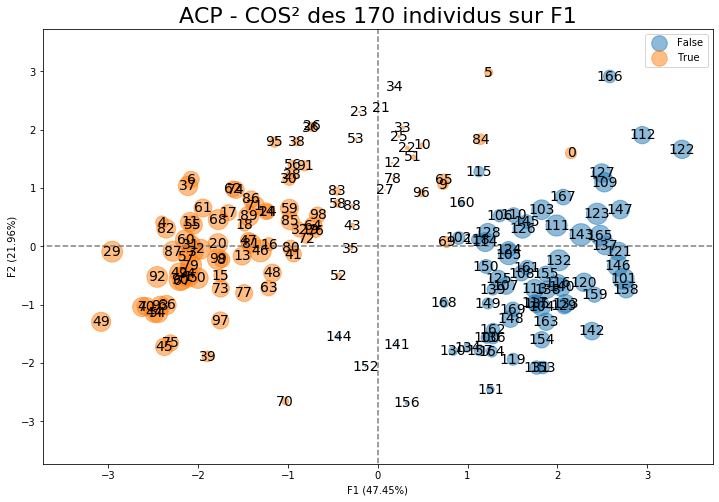

In [96]:
# initialisation de la figure       
fig = plt.figure(figsize=(12,8))

# Affichage des points et variable illustrative
illustrative_var = np.array(dataset['is_genuine'].values)
for value in np.unique(illustrative_var):
    selected = np.where(illustrative_var == value)
    plt.scatter(coord[selected, 0], coord[selected, 1], alpha=0.5, label=value, marker='o', 
                s=(cos2[selected, 0]*500))
    plt.legend()

# affichage des labels des points
for i,(x,y) in enumerate(coord[:,[0,1]]):
    plt.text(x, y, acp_dataset.index[i], fontsize='14', ha='center',va='center')
    
# détermination des limites du graphique
boundary = np.max(np.abs(coord[:, [0,1]])) * 1.1
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("ACP - COS² des {} individus sur F1".format(coord.shape[0]), fontsize=22)
plt.show(block=False)
fig.savefig("graph/ACP_cos2_ind.png")

### <span style="color:#264896" id="ctr_ind">Contribution des individus aux axes $(CTR)$</span>

Nous pouvons déterminer les individus qui influent le plus dans la définition de chaque facteur :

In [53]:
#contributions aux axes 
ctr = coord**2 
for j in range(p): 
    ctr[:,j] = ctr[:,j]/(n*valprop[j]) 
    
df_ctrind = pd.DataFrame({'id':acp_dataset.index,'CTR_F1':ctr[:,0],'CTR_F2':ctr[:,1]})
df_ctrind

,id,CTR_F1,CTR_F2
0,0,0.009527,0.011359
1,1,0.009149,0.001228
2,2,0.007997,0.000010
3,3,0.008715,0.000035
4,4,0.011863,0.000754
...,...,...,...
165,165,0.012620,0.000160
166,166,0.013729,0.037704
167,167,0.008778,0.003174
168,168,0.001123,0.004202


In [54]:
#Individus déterminants sur F1 
df_ctrind[['id','CTR_F1']].sort_values('CTR_F1', ascending=False)

,id,CTR_F1
122,122,0.023618
49,49,0.019505
29,29,0.017982
112,112,0.017845
158,158,0.015743
...,...,...
78,78,0.000059
12,12,0.000053
152,152,0.000038
27,27,0.000014


In [55]:
#Individus déterminants sur F2 
df_ctrind[['id','CTR_F2']].sort_values('CTR_F2', ascending=False)

,id,CTR_F2
5,5,0.039503
166,166,0.037704
34,34,0.033106
156,156,0.032074
70,70,0.031331
...,...,...
16,16,0.000006
35,35,0.000005
31,31,0.000003
80,80,0.000003


Grâce à ces CTR, nous pouvons déterminer les individus qui pèsent le plus sur les axes F1 et F2. **Nous n'avons pas d'individus clairement influent sur chaque axe**.

### <span style="color:#264896" id="centroides">Calcul et affichage des centroïdes sur la variable *is_genuine*</span>

In [56]:
#calcul des coordonnées des centroides
df_centroides = pd.DataFrame({'Test':dataset['is_genuine'],'F1':coord[:,0],'F2':coord[:,1]})  
df_centroides = df_centroides.pivot_table(index='Test',values=['F1','F2'],aggfunc=pd.Series.mean)
df_centroides

,F1,F2
Test,,
False,1.691374,-0.502571
True,-1.183962,0.351800


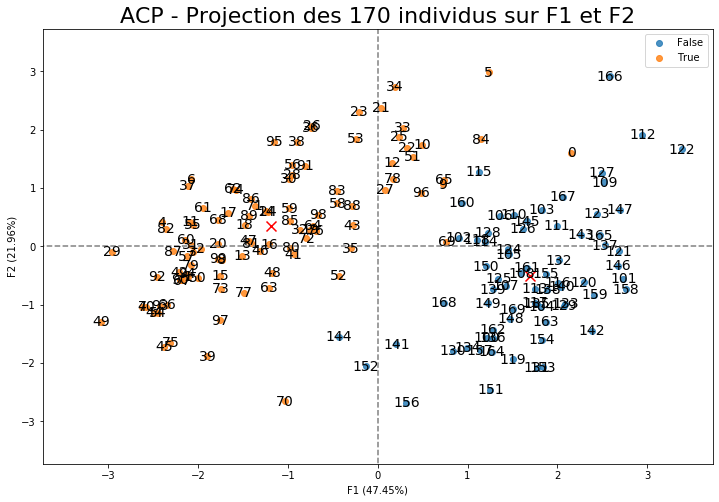

In [57]:
# initialisation de la figure       
fig = plt.figure(figsize=(12,8))

# Affichage des points et variable illustrative
illustrative_var = np.array(dataset['is_genuine'].values)
for value in np.unique(illustrative_var):
    selected = np.where(illustrative_var == value)
    plt.scatter(coord[selected, 0], coord[selected, 1], alpha=0.8, label=value)
    plt.legend()

# affichage des labels des points
for i,(x,y) in enumerate(coord[:,[0,1]]):
    plt.text(x, y, acp_dataset.index[i], fontsize='14', ha='center',va='center')
    
# affichage des centroides sur is_genuine
for j,(x1,y1) in df_centroides.iterrows():
    plt.scatter(x1,y1, c = 'red', marker='x', s=100, label="Centroides")
      
# détermination des limites du graphique
boundary = np.max(np.abs(coord[:, [0,1]])) * 1.1
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("ACP - Projection des {} individus sur F1 et F2".format(coord.shape[0]), fontsize=22)
plt.show(block=False)
fig.savefig('graph/ACP_projection_plan_factoriel.png')

# <span style="color:#264896" id="mission2">Mission 2 : Classification par Kmeans</span>

### <span style="color:#17aafa">Sommaire</span>

1. [Méthode des silhouettes](#silhouettes)    
2. [Kmeans sur les données centrées-réduites](#kmeans)
3. [Comparaison Kmeans / is_genuine](#compareK)    
4. [Projection sur le plan factoriel](#factoK)

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics

### <span style="color:#17aafa" id="silhouettes">Méthode des silhouettes pour déterminer le meilleur K</span>

Nous allons faire varier le nombre de clusters de 2 à 15 avec la méthode des silhouettes.
La variable **Z** contient les données centrées réduites du dataframe initial **SANS la variable is_genuine**.

In [59]:
res = np.arange ( 14, dtype ="double" )
for k in np.arange(14):
    kms = KMeans(n_clusters = k+2)
    kms.fit(Z)
    res[k] = metrics.silhouette_score(Z, kms.labels_)
print(res)

[0.35143613 0.29985971 0.24589618 0.20178762 0.20831772 0.20127019
 0.19750053 0.19240454 0.19510034 0.17188366 0.17852669 0.18837126
 0.17596039 0.17372495]


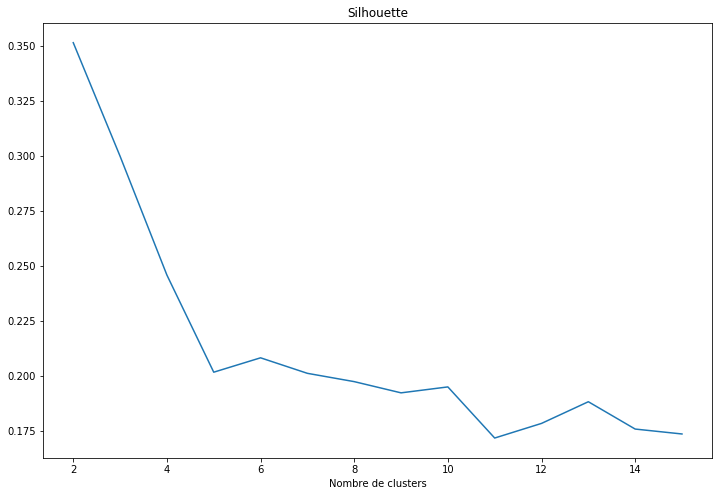

In [60]:
fig = plt.figure(figsize=(12,8))
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(np.arange(2,16,1), res)
plt.show()
fig.savefig('graph/KMEANS_silhouette.png')

On remarque donc que l'algorithme en 2K sera parfaitement pertinent, ce d'autant que nous cherchons à classifier nos données sur le résultat "vrai" ou "faux".

### <span style="color:#17aafa" id="kmeans">Kmeans sur les données centrées-réduites</span>

In [61]:
# Nombre de clusters souhaités
n_clust = 2
# Clustering par K-means avec librairie sklearn sur les données centrées réduites
km = KMeans(n_clusters=n_clust)
km.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
# Récupération des clusters attribués à chaque individu
clusters_km = km.labels_
clusters_km

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Nous allons ajouter ces clusters au dataset initial pour pouvoir les comparer avec la variable *is_genuine* :

In [63]:
dataset['Cluster'] = clusters_km

In [64]:
dataset.sample(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
159,False,171.72,104.46,104.12,4.21,3.61,110.31,0
99,True,171.81,103.96,103.47,4.00,3.00,113.10,1
48,True,171.73,103.82,103.85,3.97,3.12,112.85,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1
10,True,172.27,104.29,104.22,3.89,3.53,113.50,1
20,True,172.03,103.87,103.40,4.29,3.01,113.09,1
22,True,172.24,104.51,103.97,4.18,3.22,113.21,1
153,False,171.61,104.04,104.06,6.19,3.08,110.73,0
129,False,171.62,104.14,104.45,4.94,3.66,111.93,0
24,True,172.13,103.76,103.85,3.65,3.24,112.92,1


### <span style="color:#17aafa" id="compareK">Comparaison Kmeans / is_genuine</span>

In [65]:
# Repérer le Cluster kmeans correspondant à is_genuine = False
cross_kmeans = pd.crosstab(dataset['Cluster'], dataset['is_genuine']).reset_index()
cluster_false = cross_kmeans[cross_kmeans[False] > cross_kmeans[True]].Cluster

In [66]:
#affichage des différences
df_diff = dataset[((dataset['is_genuine'] == True) & (dataset['Cluster'] == int(cluster_false))) | ((dataset['is_genuine'] == False) & (dataset['Cluster'] != int(cluster_false)))]
df_diff

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
5,True,172.57,104.65,104.44,4.54,2.99,113.16,0
9,True,172.14,104.34,104.20,4.63,3.02,112.47,0
65,True,172.16,104.43,104.06,4.51,3.19,112.69,0
69,True,171.94,104.11,104.16,4.08,3.35,111.76,0
84,True,172.30,104.58,104.17,4.36,3.33,112.98,0
96,True,172.00,104.32,104.26,4.53,3.04,112.93,0
144,False,171.56,103.80,103.87,5.66,2.98,112.95,1


In [67]:
print("Nous avons donc une marge d'erreur de",round((df_diff.shape[0]/n)*100,2),"% sur nos",n,"individus.")

Nous avons donc une marge d'erreur de 4.71 % sur nos 170 individus.


### <span style="color:#17aafa" id="factoK">Projection sur le plan factoriel</span>

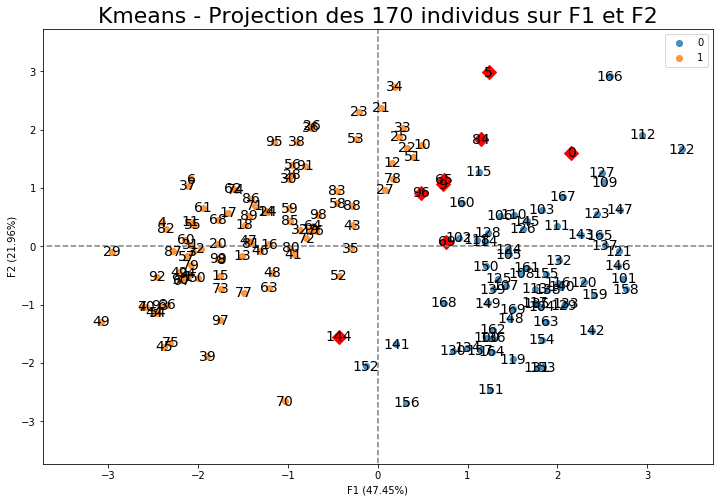

In [68]:
# initialisation de la figure       
fig = plt.figure(figsize=(12,8))

# Affichage des points et variable illustrative
illustrative_var = np.array(dataset['Cluster'].values)
for value in np.unique(illustrative_var):
    selected = np.where(illustrative_var == value)
    plt.scatter(coord[selected, 0], coord[selected, 1], alpha=0.8, label=value)
    plt.legend()

# affichage des labels des points
for i,(x,y) in enumerate(coord[:,[0,1]]):
    plt.text(x, y, acp_dataset.index[i], fontsize='14', ha='center',va='center')
    
#Affichage des points différents
for ind in df_diff.iterrows():
    plt.scatter(coord[ind[0],0], coord[ind[0],1], alpha=1, marker="D", s=100, color="r")
      
# détermination des limites du graphique
boundary = np.max(np.abs(coord[:, [0,1]])) * 1.1
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

plt.title("Kmeans - Projection des {} individus sur F1 et F2".format(coord.shape[0]), fontsize=22)
plt.show(block=False)
fig.savefig('graph/KMEANS_projection_plan_factoriel.png')

Les losanges rouges représentent les différences Kmeans avec la variable *is_genuine*. **Majoritairement, il s'agit de vrais billets qui sont considérés comme faux dans la classification Kmeans**. On remarque que ces points sont assez centraux et éloignés de leurs centroïdes respectifs.

In [69]:
df_inertie = pd.DataFrame(km.transform(Z), index=dataset.index, columns=["I0","I1"])
df_inertie_diff = df_inertie[df_inertie.index.isin(df_diff.index.to_list())]
df_inertie_diff

,I0,I1
0,3.941603,4.991269
5,3.499126,3.889395
9,1.878485,2.370231
65,1.847197,2.330690
69,1.683233,2.512500
84,2.451985,3.101858
96,2.047235,2.204027
144,2.961691,2.636674


En affichant les distances aux centroïdes de ces individus, on remarque qu'ils sont relativement proches sur $I_0$ et $I_1$. Mais on ne peut pas prendre ce critère pour les caractériser car c'est aussi le cas d'autres points qui eux sont bien catégorisés :

In [70]:
df_inertie_diff["ecart"] = abs(df_inertie_diff["I0"] - df_inertie_diff["I1"])
df_inertie_diff

,I0,I1,ecart
0,3.941603,4.991269,1.049666
5,3.499126,3.889395,0.390268
9,1.878485,2.370231,0.491746
65,1.847197,2.330690,0.483493
69,1.683233,2.512500,0.829268
84,2.451985,3.101858,0.649873
96,2.047235,2.204027,0.156793
144,2.961691,2.636674,0.325016


In [71]:
df_inertie[abs(df_inertie["I0"] - df_inertie["I1"]) <= df_inertie_diff["ecart"].max()]

,I0,I1
0,3.941603,4.991269
5,3.499126,3.889395
9,1.878485,2.370231
10,3.056272,3.024926
12,2.982944,2.659477
21,3.207075,2.598139
22,2.654026,2.433865
23,3.337672,2.538810
25,3.095021,2.751587
27,2.700608,2.343449


Nous allons à présent réaliser une modélisation des données afin de créer un programme capable d'effectuer une prédiction sur un billet. Une régression logistique plus précisement car la variable à estimer est de type qualitative binomiale.

Cette modélisation est disponible dans le notebook [P6_03_Logit](P6_03_Logit.ipynb)